In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
!unzip /content/drive/MyDrive/TUBESKB/dataset.zip -d /content/

Archive:  /content/drive/MyDrive/TUBESKB/dataset.zip
   creating: /content/dataset/test/
  inflating: /content/dataset/test/Dian Meldayani.jpg  
  inflating: /content/dataset/test/Dimaz.jpg  
  inflating: /content/dataset/test/Fahruddin.jpg  
  inflating: /content/dataset/test/Fiorentino.jpg  
   creating: /content/dataset/train/
  inflating: /content/dataset/train/Dian Meldayani.jpg  
  inflating: /content/dataset/train/Dimaz.jpg  
  inflating: /content/dataset/train/Fahruddin.jpg  
  inflating: /content/dataset/train/Fiorentino.jpg  


In [61]:
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import accuracy_score
import os

In [279]:
def extract_hog(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    return fd, hog_image

In [297]:
def plot_image_with_class(image, title, class_name):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} Nama: {class_name}")
    plt.axis("off")
    plt.show()

In [298]:
# Muat satu gambar
image_path = "/content/dataset/test/Fiorentino.jpg"
image = cv2.imread(image_path)

In [299]:
# Ekstrak fitur HOG
hog_features, hog_image = extract_hog(image)

In [300]:
# Tetapkan image_class sebagai nama dasar file tanpa ekstensi
image_class = os.path.splitext(os.path.basename(image_path))[0]

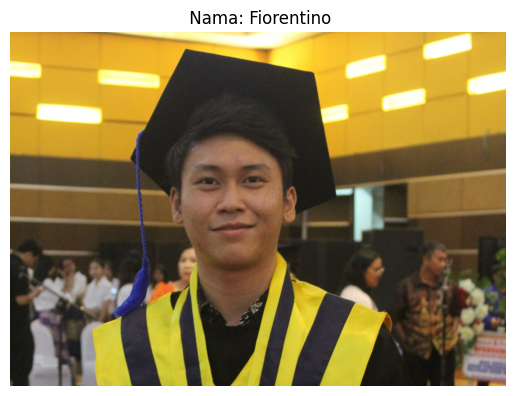

In [301]:
# Menampilkan gambar asli dengan nama kelas
plot_image_with_class(image, "", image_class)

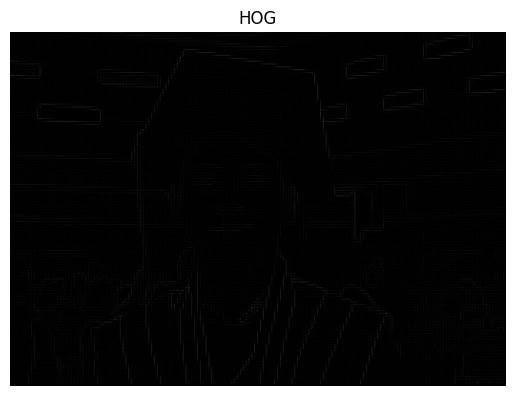

In [302]:
# Display the HOG features
plt.imshow(hog_image, cmap="gray")
plt.title("HOG")
plt.axis("off")
plt.show()

In [303]:
# Load dataset and extract HOG features for each image

data_path = "/content/dataset/train/"
labels = []
hog_features_list = []

In [273]:
# Load dataset MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
# Konversi tipe data ke integer
X = X.astype('int')
y = y.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [274]:
X = np.array(X)
y = np.array(y)

In [275]:
# Split dataset ke dalam training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
# Ekstraksi fitur HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        fd, hog_image = hog(image.reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return hog_features

In [277]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

In [278]:
# Contoh: Model menggunakan SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_hog, y_train)
svm_predictions = svm_model.predict(X_test_hog)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9537857142857142
